In [129]:
import reg_analysis as ra
import pandas as pd
import xgb_param as xp
import numpy as np
import matplotlib.pyplot as plt
from xgboost import plot_tree
import seaborn as sns
from sklearn.model_selection import train_test_split

## XGB Analysis

In [130]:
train = pd.read_csv('../data/train_new2.csv')
test = pd.read_csv('../data/test_new2.csv')

In [131]:
train.drop(1567,axis=0,inplace=True)
# train.drop([635,1059,1212,1497,1525,1919,1567],axis=0,inplace=True)

In [132]:

train.drop(['weather_屋内','weather_曇','weather_のち', 'weather_時々', 'weather_一時','weather_霧','weather_雪','weather_雷','ｽｶﾊﾟｰ','BS-TBS','address','home_01', 'home_02',  'home_03', 'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09', 'home_10', 'home_11', 'away_01', 'away_02', 'away_03', 'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09','away_10', 'away_11','referee', 'stadium','away_stadium','home_stadium','lat','lng','home_score','away_score','地方局','day','year'],axis=1 ,inplace=True)

test.drop(['weather_屋内','weather_曇','weather_のち', 'weather_時々', 'weather_一時','weather_霧','weather_雪','weather_雷','ｽｶﾊﾟｰ','BS-TBS','address','home_01', 'home_02',  'home_03', 'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09', 'home_10', 'home_11', 'away_01', 'away_02', 'away_03', 'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09','away_10', 'away_11','referee','stadium','away_stadium','home_stadium', 'lat','lng','home_score','away_score','地方局','day','year'],axis=1 ,inplace=True)

In [133]:
y = train['y']
x = train.drop(['id','y'],axis=1)

In [134]:
model = ra.xgb_analysis(x,y)

In [135]:
params =  {'learning_rate': 0.03, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.0, 'subsample': 0.65, 'colsample_bytree': 0.25, 'objective': 'reg:squarederror', 'nthread': 4, 'scale_pos_weight': 1, 'seed': 1, 'reg_alpha': 140}
model2 = ra.xgb_analysis(x,y,params)
ra.Compare_data(model2,test)

2790.245093078777

In [136]:
import xgboost as xgb
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4
# rcParams['figure.figsize'] = 80,150
# xgb.plot_tree(model2,num_trees=5)

In [137]:
ans = pd.read_csv('../data/submission/sub_adjust2.csv',names=('id','y'))
result = pd.read_csv('../data/result.csv')

In [138]:
pd.DataFrame({
    'id':ans['id'],
    'diff' : np.abs(ans['y'] - model2.predict(test.drop(['id'],axis=1))),
    'diff2' : np.abs(result['y'] - model2.predict(test.drop(['id'],axis=1))),
    'diff3' : np.abs(result['y'] - ans['y'] ),
    'pred' : model2.predict(test.drop(['id'],axis=1)),
    'ans':result['y']
}).to_csv('../data/compare_info.csv',index=False)

In [139]:
ra.Export_csv(model2,test,'sub_adjust4')

In [140]:
# plt.figure(figsize=(36, 18)) 
# sns.heatmap(train.drop(['id'],axis=1).corr(), vmax=1, vmin=-1, center=0, cmap="coolwarm", annot=True, )
# plt.show()

In [141]:
a
rmse = []
params =  {'learning_rate': 0.03, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.0, 'subsample': 0.65, 'colsample_bytree': 0.25, 'objective': 'reg:squarederror', 'nthread': 4, 'scale_pos_weight': 1, 'seed': 17, 'reg_alpha': 140}
for i in range(1,3002,100):
    params['seed'] = i

    rmse.append(ra.Compare_data(ra.xgb_analysis(x,y,params),test))
plt.plot(rmse) 

NameError: name 'a' is not defined

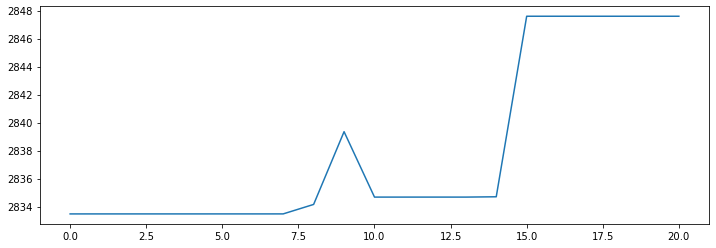

In [14]:
rmse = []
params =  {'learning_rate': 0.03, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.0, 'subsample': 0.65, 'colsample_bytree': 0.25, 'objective': 'reg:squarederror', 'nthread': 4, 'scale_pos_weight': 1, 'seed': 2400, 'reg_alpha': 140}
for i in range(1,211,10):
    params['reg_alpha'] = (i-1)/100

    rmse.append(ra.Compare_data(ra.xgb_analysis(x,y,params),test))
plt.plot(rmse) 

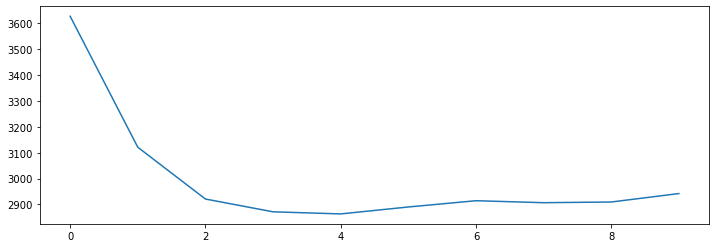

In [15]:
rmse = []
params =  {'learning_rate': 0.03, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.0, 'subsample': 0.65, 'colsample_bytree': 0.25,'colsample_bylevel': 0.8, 'objective': 'reg:squarederror', 'nthread': 4, 'scale_pos_weight': 1, 'seed': 2400, 'reg_alpha': 140}
for i in range(1,11):
   params['max_depth'] = i

   rmse.append(ra.Compare_data(ra.xgb_analysis(x,y,params),test))
plt.plot(rmse) 

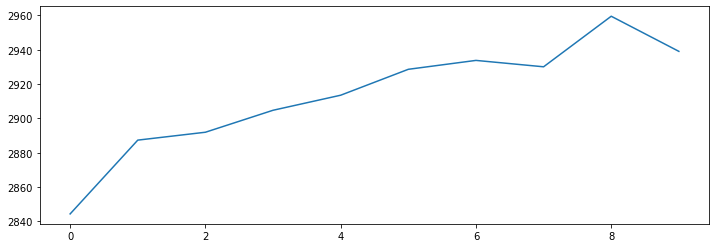

In [16]:
rmse = []
params =  {'learning_rate': 0.03, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.0, 'subsample': 0.65, 'colsample_bytree': 0.25, 'objective': 'reg:squarederror', 'nthread': 4, 'scale_pos_weight': 1, 'seed': 2400, 'reg_alpha': 140}
for i in range(1,11):
    params['min_child_weight'] = i

    rmse.append(ra.Compare_data(ra.xgb_analysis(x,y,params),test))
plt.plot(rmse) 

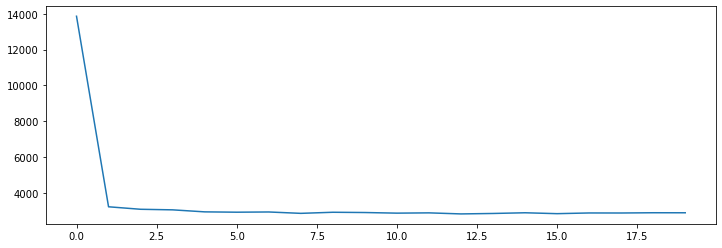

In [17]:
rmse = []
params =  {'learning_rate': 0.03, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.0, 'subsample': 0.65, 'colsample_bytree': 0.25, 'objective': 'reg:squarederror', 'nthread': 4, 'scale_pos_weight': 1, 'seed': 2400, 'reg_alpha': 140}
for i in range(1,101,5):
    params['subsample'] = (i-1)/100

    rmse.append(ra.Compare_data(ra.xgb_analysis(x,y,params),test))
plt.plot(rmse) 

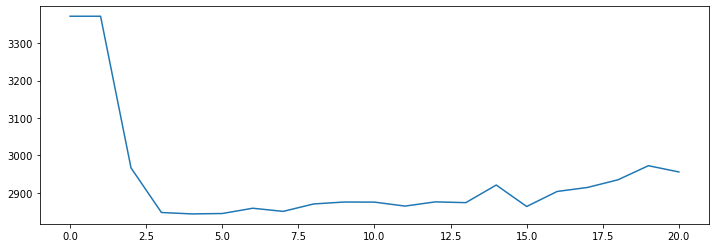

In [18]:
rmse = []
params =  {'learning_rate': 0.03, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.0, 'subsample': 0.65, 'colsample_bytree': 0.25, 'objective': 'reg:squarederror', 'nthread': 4, 'scale_pos_weight': 1, 'seed': 2400, 'reg_alpha': 140}
for i in range(1,102,5):
    params['colsample_bytree'] = (i-1)/100

    rmse.append(ra.Compare_data(ra.xgb_analysis(x,y,params),test))
plt.plot(rmse) 

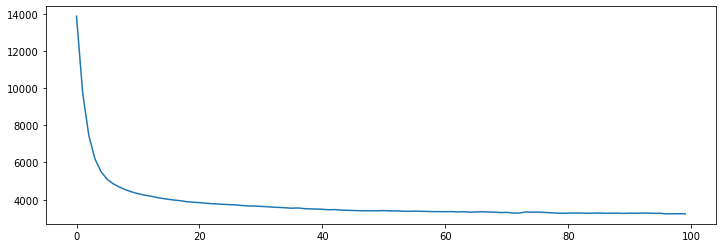

In [43]:
rmse = []
params =  {'learning_rate': 0.01, 'n_estimators': 500, 'max_depth': 1, 'min_child_weight': 1, 'gamma': 0.0, 'subsample': 0.65, 'colsample_bytree': 0.25, 'objective': 'reg:squarederror', 'nthread': 4, 'scale_pos_weight': 1, 'seed': 2400, 'reg_alpha': 140}
for i in range(1,101):
    params['learning_rate'] = (i -1)/1000

    rmse.append(ra.Compare_data(ra.xgb_analysis(x,y,params),test))
plt.plot(rmse) 

In [20]:
# import datetime

# with open('./test_memory.txt','a')as f:
#     f.write("test : "+str(datetime.datetime.now()) + "\n")
#     f.write("columns : " + str(x.columns) + "\n")
#     f.write("params : " + str(params) + "\n")
#     f.write("rmse : "+str(ra.Compare_data(model2,test)) + "\n\n")
# f.close()

In [21]:
# ra.Compare_data(model2,test)

In [22]:
# ra.Export_csv(model2,test,'sub_adjust2')

In [23]:
# xp.param_optimize(train,test)

In [24]:
# for col in x.columns:
#     print(f"column : {col} ")
#     ra.Compare_data(ra.xgb_analysis(x.drop([col],axis=1),y),test.drop([col],axis=1))
#     print("\n")

In [25]:
result = pd.read_csv('../data/result.csv')

In [26]:
result = pd.merge(left= result,right=test,on='id')
result.shape

(351, 35)

In [27]:
# result.corr()

In [28]:
# result = pd.read_csv('../data/result.csv')
# test = pd.read_csv('../data/test_new.csv')

In [29]:
# result = pd.merge(left= result,right=test,on='id')

In [30]:
# plt.figure(figsize=(36, 18)) 
# sns.heatmap(result.drop(['id'],axis=1).corr(), vmax=1, vmin=-1, center=0, cmap="coolwarm", annot=True, )
# plt.show()

## cat analysis

In [31]:
train = pd.read_csv('../data/train_new.csv')
test = pd.read_csv('../data/test_new.csv')

In [32]:
y = train['y']
x = train.drop(['id','y'],axis=1)

In [33]:
modelc = ra.cat_analysis(x,y)
ra.Compare_data(modelc , test)

g: 890ms
797:	learn: 761.3472926	test: 2601.1371811	best: 2599.6957331 (763)	total: 3.5s	remaining: 886ms
798:	learn: 760.1659684	test: 2601.4169587	best: 2599.6957331 (763)	total: 3.5s	remaining: 881ms
799:	learn: 759.2150211	test: 2601.5046342	best: 2599.6957331 (763)	total: 3.51s	remaining: 877ms
800:	learn: 757.9777319	test: 2602.2815928	best: 2599.6957331 (763)	total: 3.51s	remaining: 872ms
801:	learn: 757.0783503	test: 2602.4349554	best: 2599.6957331 (763)	total: 3.51s	remaining: 868ms
802:	learn: 756.5230541	test: 2602.4638875	best: 2599.6957331 (763)	total: 3.52s	remaining: 863ms
803:	learn: 755.0757418	test: 2602.5779014	best: 2599.6957331 (763)	total: 3.52s	remaining: 859ms
804:	learn: 754.1686983	test: 2602.6560203	best: 2599.6957331 (763)	total: 3.53s	remaining: 855ms
805:	learn: 752.8984694	test: 2602.8598127	best: 2599.6957331 (763)	total: 3.53s	remaining: 850ms
806:	learn: 751.7677335	test: 2602.4637550	best: 2599.6957331 (763)	total: 3.54s	remaining: 846ms
807:	learn: 7

2971.437943742028

In [34]:
# modelc = ra.cat_analysis(x,y)
# ra.Compare_data(modelc , test)

In [35]:
pd.DataFrame({
    'id':x.columns,
    'importance':modelc.feature_importances_
}).sort_values('importance',ascending=False).tail(10)

,id,importance
44,weather_屋内,0.043257
10,BS-TBS,0.036404
49,weather_時々,0.034396
12,地方局,0.017381
50,weather_一時,0.016158
48,weather_のち,0.014433
47,weather_霧,0.000000
13,ｽｶﾊﾟｰ,0.000000
45,weather_雷,0.000000
46,weather_雪,0.000000


In [36]:
# ra.Export_csv(modelc,test,'sub_cat')

In [37]:
# params = xp.cat_hyper(x,y,100)

In [38]:
# modelc = ra.cat_analysis(x,y,params)
# ra.Compare_data(modelc , test)